In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math

# 데이터 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
filename = '/content/drive/Shareddrives/팔당댐/combined_data/combined_train_test_filled_cleansed.csv'
df = pd.read_csv(filename, index_col='ymdhm', parse_dates=['ymdhm'])
df.head()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0


In [5]:
df.describe()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
count,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.0,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000
mean,25.079251,548.548083,219.425047,24.575537,542.036770,345.631700,329.232797,746.826551,316.071760,0.0,312.590404,600.970021,299.979812,1056.807758,0.034074,0.038265,0.035985
std,0.146126,1110.978412,9.912109,9.911699,1104.317791,174.250734,76.559900,1077.388189,67.495669,0.0,63.883452,1376.848129,51.442783,1428.279212,0.338607,0.370553,0.360769
min,23.993000,-807.500000,176.380000,2.150000,-222.000000,39.000000,259.700000,243.290000,246.200000,0.0,247.000000,-3522.710000,241.300000,212.040000,0.000000,0.000000,0.000000
25%,24.980000,127.417500,211.770000,14.670000,132.000000,192.000000,287.700000,319.840000,278.200000,0.0,275.000000,205.082500,267.300000,449.120000,0.000000,0.000000,0.000000
50%,25.100000,249.570000,217.630000,26.370000,174.980000,324.000000,307.000000,441.000000,297.200000,0.0,295.000000,355.980000,286.300000,679.420000,0.000000,0.000000,0.000000
75%,25.190000,530.000000,229.330000,32.230000,505.000000,487.000000,342.700000,725.690000,330.200000,0.0,328.000000,709.710000,316.300000,1142.220000,0.000000,0.000000,0.000000
max,25.449000,25991.500000,241.850000,67.620000,25791.500000,842.000000,1287.700000,9405.640000,1146.200000,0.0,1080.000000,25289.170000,843.300000,29854.120000,24.000000,21.000000,24.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276336 entries, 2012-05-01 00:00:00 to 2022-07-18 23:50:00
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   swl          276336 non-null  float64
 1   inf          276336 non-null  float64
 2   sfw          276336 non-null  float64
 3   ecpc         276336 non-null  float64
 4   tototf       276336 non-null  float64
 5   tide_level   276336 non-null  float64
 6   wl_1018662   276336 non-null  float64
 7   fw_1018662   276336 non-null  float64
 8   wl_1018680   276336 non-null  float64
 9   fw_1018680   276336 non-null  float64
 10  wl_1018683   276336 non-null  float64
 11  fw_1018683   276336 non-null  float64
 12  wl_1019630   276336 non-null  float64
 13  fw_1019630   276336 non-null  float64
 14  rf_10184100  276336 non-null  float64
 15  rf_10184110  276336 non-null  float64
 16  rf_10184140  276336 non-null  float64
dtypes: float64(17)
memory usage: 37.9

In [7]:
df.isnull().sum()

swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level     0
wl_1018662     0
fw_1018662     0
wl_1018680     0
fw_1018680     0
wl_1018683     0
fw_1018683     0
wl_1019630     0
fw_1019630     0
rf_10184100    0
rf_10184110    0
rf_10184140    0
dtype: int64

In [70]:
sub_df = pd.read_csv('/content/drive/Shareddrives/팔당댐/competition_data/sample_submission.csv',index_col=0)
sub_df.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,0,0,0,0
2022-06-01 00:10,0,0,0,0
2022-06-01 00:20,0,0,0,0
2022-06-01 00:30,0,0,0,0
2022-06-01 00:40,0,0,0,0


In [72]:
df.sort_index(inplace=True)
sub_df.sort_index(inplace=True)

In [73]:
target = df.loc[:,sub_df.columns]
data = df.drop(sub_df.columns,axis=1)

In [74]:
target.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2012-05-01 00:00:00,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,311.7,301.2,291.0,277.3


In [75]:
data.head()

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.8,218.69,25.31,563.1,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.1,218.69,25.31,576.4,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0


In [78]:
# data와 target 하나 밀어주기 (과거데이터를 사용해야 함으로)
y = target.reset_index(drop=True)
X = data.reset_index(drop=True)

X.index += 1

tot=pd.concat((X,y),axis=1)
tot=tot.sort_index()

tot=tot.iloc[1:-1]

target = tot.loc[:,sub_df.columns]
data = tot.drop(sub_df.columns,axis=1)

In [80]:
train_target=target.iloc[:-len(sub_df),:]
test_target=target.iloc[-len(sub_df):,:]

train_data=data.iloc[:-len(sub_df),:]
test_data=data.iloc[-len(sub_df):,:]

# train-test 데이터 나누기

In [8]:
# 독립/종속변수 나누기
# x = df[['swl','inf','sfw','ecpc','tototf','tide_level','fw_1018662','fw_1018680','fw_1018683','fw_1019630','rf_10184100','rf_10184110','rf_10184140']]
# y = df[['wl_1018662','wl_1018680','wl_1018683','wl_1019630']]

In [87]:
# X_train, y_train
train_data = df.loc[:'2022-05-31',
                  ['swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018680', 
                   'fw_1018683','fw_1019630', 'rf_10184100', 'rf_10184110', 'rf_10184140']]
train_target = df.loc[:'2022-05-31',['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

In [88]:
train_data

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 23:10:00,25.180,140.94,217.99,26.01,140.94,220.0,285.72,0.0,575.57,493.58,0.0,0.0,0.0
2022-05-31 23:20:00,25.180,141.07,217.99,26.01,141.07,208.0,274.78,0.0,501.04,505.03,0.0,0.0,0.0
2022-05-31 23:30:00,25.180,141.01,217.99,26.01,141.01,196.0,269.40,0.0,425.89,505.03,0.0,0.0,0.0


In [89]:
# X_test, y_test
test_data = df.loc['2022-06-01':,  
                   ['swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018680', 
                   'fw_1018683','fw_1019630', 'rf_10184100', 'rf_10184110', 'rf_10184140']]
test_target= df.loc['2022-06-01': , ['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

In [90]:
test_data

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,
2022-06-01 00:00:00,25.19,140.60,218.36,25.64,140.60,162.0,269.40,0.0,8.23,471.08,0.0,0.0,0.0
2022-06-01 00:10:00,25.19,140.78,218.36,25.64,140.78,151.0,280.22,0.0,28.82,449.12,0.0,0.0,0.0
2022-06-01 00:20:00,25.20,755.90,218.73,25.27,140.90,141.0,296.87,0.0,12.35,417.17,0.0,0.0,0.0
2022-06-01 00:30:00,25.19,0.00,218.36,25.64,140.94,130.0,302.53,0.0,53.52,386.43,0.0,0.0,0.0
2022-06-01 00:40:00,25.19,140.63,218.36,25.64,140.63,120.0,296.87,0.0,107.04,366.60,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.04,259.23,212.86,31.14,259.23,510.0,319.84,0.0,-456.41,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.04,260.46,212.86,31.14,260.46,492.0,314.01,0.0,-717.30,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.04,259.37,212.86,31.14,259.37,475.0,387.55,0.0,-843.37,1039.90,0.0,0.0,0.0


* train y

In [91]:
y1 = train_target.iloc[:,0] #청담대교
y2 = train_target.iloc[:,1] #잠수교
y3 = train_target.iloc[:,2] #한강대교 
y4 = train_target.iloc[:,3] #행주대교

In [92]:
train_target.shape

(269424, 4)

In [101]:
y1

ymdhm
2012-05-01 00:00:00    310.7
2012-05-01 00:10:00    314.7
2012-05-01 00:20:00    313.7
2012-05-01 00:30:00    311.7
2012-05-01 00:40:00    311.7
                       ...  
2022-05-31 23:10:00    281.7
2022-05-31 23:20:00    279.7
2022-05-31 23:30:00    278.7
2022-05-31 23:40:00    277.7
2022-05-31 23:50:00    278.7
Name: wl_1018662, Length: 269424, dtype: float64

* test y

In [93]:
y1_test = test_target.iloc[:,0] #청담대교
y2_test = test_target.iloc[:,1] #잠수교
y3_test = test_target.iloc[:,2] #한강대교 
y4_test = test_target.iloc[:,3] #행주대교

In [94]:
test_target.shape

(6912, 4)

In [102]:
y1_test

ymdhm
2022-06-01 00:00:00    279.0
2022-06-01 00:10:00    281.0
2022-06-01 00:20:00    284.0
2022-06-01 00:30:00    285.0
2022-06-01 00:40:00    284.0
                       ...  
2022-07-18 23:10:00    288.0
2022-07-18 23:20:00    287.0
2022-07-18 23:30:00    299.0
2022-07-18 23:40:00    309.0
2022-07-18 23:50:00    326.0
Name: wl_1018662, Length: 6912, dtype: float64

# feature scaling

## standardization

In [81]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [95]:
x_train_std = scaler.fit_transform(train_data) # 학습데이터 feature scaling
x_test_std = scaler.transform(test_data)

In [96]:
x_train_std

array([[-1.92856241,  0.01061297, -0.05720692, ..., -0.09883217,
        -0.10173166, -0.09795471],
       [-1.96967266, -0.07114545, -0.07837488, ..., -0.09883217,
        -0.10173166, -0.09795471],
       [-2.00393121, -0.05893595, -0.09551085, ..., -0.09883217,
        -0.10173166, -0.09795471],
       ...,
       [ 0.67508685, -0.36380259, -0.16607071, ..., -0.09883217,
        -0.10173166, -0.09795471],
       [ 0.74360394,  0.19217273, -0.12877478, ..., -0.09883217,
        -0.10173166, -0.09795471],
       [ 0.74360394, -0.36420957, -0.12877478, ..., -0.09883217,
        -0.10173166, -0.09795471]])

In [97]:
x_train_std.shape

(269424, 13)

In [98]:
train_target.shape

(269424, 4)

# 모델

In [23]:
import xgboost as xgb

## 파라미터 조정 -> regressor는 없고 classifier만 있음 = 실패

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear','reg:squarederror']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator='reg:squarederror',
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [47]:
random_cv.fit(train_data,y1)

TypeError: ignored

## 임의로 지정

In [ ]:
# xgb_model = xgb.XGBRegressor(max_depth=2, n_estimators=1000)

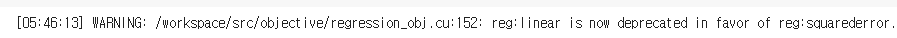

[05:46:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

* 위에 error로 인해서 reg:squarederror 로 바꿈

In [99]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', max_depth = 2, n_estimators = 1000)

## 종속1

* train 데이터

In [100]:
y1

ymdhm
2012-05-01 00:00:00    310.7
2012-05-01 00:10:00    314.7
2012-05-01 00:20:00    313.7
2012-05-01 00:30:00    311.7
2012-05-01 00:40:00    311.7
                       ...  
2022-05-31 23:10:00    281.7
2022-05-31 23:20:00    279.7
2022-05-31 23:30:00    278.7
2022-05-31 23:40:00    277.7
2022-05-31 23:50:00    278.7
Name: wl_1018662, Length: 269424, dtype: float64

In [103]:
y1 = np.array(y1)
y1

array([310.7, 314.7, 313.7, ..., 278.7, 277.7, 278.7])

In [104]:
xgb_model1=xgb_model.fit(train_data, y1)

In [105]:
xgb_model1

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

* y_preds

In [106]:
y_preds = xgb_model1.predict(test_data)

* test데이터

In [107]:
y1_test = np.array(y1_test)

* score 보기

In [108]:
xgb_model1.score(test_data, y1_test)

0.9994929559860567

In [109]:
y1_test.shape

(6912,)

## 종속2

In [110]:
y2_train = np.array(y2)

In [111]:
xgb_model.fit(train_data, y2)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [112]:
y_preds2 = xgb_model.predict(test_data)

In [113]:
y2_test = np.array(y2_test)

In [114]:
xgb_model.score(test_data, y2_test)

0.9944766166268493

## 종속3

In [115]:
y3_train = np.array(y3)

In [116]:
xgb_model.fit(train_data, y3)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [117]:
y_preds3 = xgb_model.predict(test_data)

In [118]:
y3_test = np.array(y3_test)

In [119]:
xgb_model.score(test_data, y3_test)

0.9976751390140435

## 종속 4

In [120]:
y4_train = np.array(y4)

In [121]:
xgb_model.fit(train_data, y4_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [122]:
y_preds4 = xgb_model.predict(test_data)

In [123]:
y4_test = np.array(y4_test)

In [124]:
xgb_model.score(test_data, y4_test)

0.9999737480693739

## 합치기

### test

In [125]:
y1_test = pd.DataFrame(y1_test)
y2_test = pd.DataFrame(y2_test)
y3_test = pd.DataFrame(y3_test)
y4_test = pd.DataFrame(y4_test)

In [126]:
print(y1_test.shape)
print(y2_test.shape)
print(y3_test.shape)
print(y4_test.shape)

(6912, 1)
(6912, 1)
(6912, 1)
(6912, 1)


In [127]:
y_test=pd.concat([y1_test,y2_test,y3_test,y4_test], axis = 1)
y_test.columns = ['wl_1018662','wl_1018680','wl_1018683','wl_1019630']

In [128]:
y_test

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,279.0,276.0,274.0,269.0
1,281.0,277.0,274.0,267.0
2,284.0,277.0,274.0,264.0
3,285.0,277.0,274.0,261.0
4,284.0,278.0,274.0,259.0
...,...,...,...,...
6907,288.0,295.0,299.0,306.0
6908,287.0,303.0,304.0,308.0
6909,299.0,307.0,309.0,310.0
6910,309.0,311.0,314.0,312.0


In [129]:
y_test.shape

(6912, 4)

### train

In [130]:
y1_train = pd.DataFrame(y1)
y2_train = pd.DataFrame(y2)
y3_train = pd.DataFrame(y3)
y4_train = pd.DataFrame(y4)

In [131]:
print(y1_train.shape)
print(y2_train.shape)
print(y3_train.shape)
print(y4_train.shape)

(269424, 1)
(269424, 1)
(269424, 1)
(269424, 1)


In [132]:
y_train=pd.concat([y1_train,y2_train,y3_train,y4_train], axis = 1)
y_train.columns = ['wl_1018662','wl_1018680','wl_1018683','wl_1019630']

In [133]:
y_train

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,310.7,NaN,NaN,NaN
1,314.7,NaN,NaN,NaN
2,313.7,NaN,NaN,NaN
3,311.7,NaN,NaN,NaN
4,311.7,NaN,NaN,NaN
...,...,...,...,...
2022-05-31 23:10:00,NaN,281.2,278.0,271.3
2022-05-31 23:20:00,NaN,279.2,278.0,272.3
2022-05-31 23:30:00,NaN,277.2,277.0,272.3
2022-05-31 23:40:00,NaN,276.2,276.0,271.3


In [134]:
y_train.shape

(538848, 4)

# TEST data

In [135]:
# 표준화
test_data_scaled = scaler.fit_transform(test_data)

In [136]:
test_data = pd.DataFrame(test_data_scaled,columns=test_data.columns)

In [137]:
test_data.head()

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,1.575273,-0.478334,1.564882,-1.564882,-0.480119,-1.125241,-0.421477,0.0,-0.497826,-0.434363,-0.156112,-0.152065,-0.15499
1,1.575273,-0.478193,1.564882,-1.564882,-0.479968,-1.189069,-0.413937,0.0,-0.485315,-0.447857,-0.156112,-0.152065,-0.15499
2,1.655115,0.001116,1.645106,-1.645106,-0.479868,-1.247094,-0.402334,0.0,-0.495323,-0.467489,-0.156112,-0.152065,-0.15499
3,1.575273,-0.587891,1.564882,-1.564882,-0.479835,-1.310922,-0.398390,0.0,-0.470307,-0.486377,-0.156112,-0.152065,-0.15499
4,1.575273,-0.478310,1.564882,-1.564882,-0.480094,-1.368947,-0.402334,0.0,-0.437786,-0.498562,-0.156112,-0.152065,-0.15499


In [138]:
test_data.shape

(6912, 13)

# 예측

In [139]:
y_preds

array([278.6659 , 280.8382 , 283.7302 , ..., 298.65076, 308.4953 ,
       325.89648], dtype=float32)

In [140]:
y_preds2

array([269.8279 , 271.66956, 274.85544, ..., 302.64478, 306.3976 ,
       317.4074 ], dtype=float32)

In [141]:
y_preds3

array([270.97546, 271.86115, 273.33548, ..., 307.40158, 313.4723 ,
       318.29987], dtype=float32)

In [142]:
y_preds4

array([269.3193 , 267.31805, 264.27896, ..., 310.2632 , 312.31393,
       313.31818], dtype=float32)

* preds 합치기

In [143]:
y_preds = pd.DataFrame(y_preds)
y_preds2 = pd.DataFrame(y_preds2)
y_preds3 = pd.DataFrame(y_preds3)
y_preds4 = pd.DataFrame(y_preds4)

In [144]:
pred=pd.concat([y_preds,y_preds2,y_preds3,y_preds4], axis = 1)
pred.columns = ['0','1','2','3']

In [145]:
pred.head()

,0,1,2,3
0,278.665894,269.827911,270.975464,269.319305
1,280.838196,271.669556,271.861145,267.318054
2,283.730194,274.855438,273.335480,264.278961
3,284.587524,273.520691,270.673035,261.321320
4,283.703949,271.633179,268.975616,259.304779


In [146]:
pred['0']

0       278.665894
1       280.838196
2       283.730194
3       284.587524
4       283.703949
           ...    
6907    287.734283
6908    286.846832
6909    298.650757
6910    308.495300
6911    325.896484
Name: 0, Length: 6912, dtype: float32

In [147]:
pred

,0,1,2,3
0,278.665894,269.827911,270.975464,269.319305
1,280.838196,271.669556,271.861145,267.318054
2,283.730194,274.855438,273.335480,264.278961
3,284.587524,273.520691,270.673035,261.321320
4,283.703949,271.633179,268.975616,259.304779
...,...,...,...,...
6907,287.734283,291.028595,295.584961,306.304932
6908,286.846832,293.875977,298.663055,308.271851
6909,298.650757,302.644775,307.401581,310.263214
6910,308.495300,306.397614,313.472290,312.313934


In [148]:
pred.shape

(6912, 4)

# 제출양식

In [149]:
sub_df = pd.read_csv('/content/drive/Shareddrives/팔당댐/competition_data/sample_submission.csv',index_col=0)
sub_df.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,0,0,0,0
2022-06-01 00:10,0,0,0,0
2022-06-01 00:20,0,0,0,0
2022-06-01 00:30,0,0,0,0
2022-06-01 00:40,0,0,0,0


In [150]:
sub_df.shape

(6912, 4)

In [151]:
sub_df['wl_1018662'] = pred['0']
sub_df['wl_1018680'] = pred['1']
sub_df['wl_1018683'] = pred['2']
sub_df['wl_1019630'] = pred['3']

In [152]:
sub_df.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,NaN,NaN,NaN,NaN
2022-06-01 00:10,NaN,NaN,NaN,NaN
2022-06-01 00:20,NaN,NaN,NaN,NaN
2022-06-01 00:30,NaN,NaN,NaN,NaN
2022-06-01 00:40,NaN,NaN,NaN,NaN


In [153]:
# sub_df = sub_df.astype(float)

In [154]:
pred.columns = sub_df.columns

In [155]:
pred.index = sub_df.index

In [156]:
pred.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,278.665894,269.827911,270.975464,269.319305
2022-06-01 00:10,280.838196,271.669556,271.861145,267.318054
2022-06-01 00:20,283.730194,274.855438,273.335480,264.278961
2022-06-01 00:30,284.587524,273.520691,270.673035,261.321320
2022-06-01 00:40,283.703949,271.633179,268.975616,259.304779


In [158]:
pred.to_csv('/content/drive/Shareddrives/팔당댐/제출/XGBoost(1).csv')